<a href="https://colab.research.google.com/github/sberniz/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-dimensionality-reduction/DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math

In [47]:
sales = np.array([3505,2400,2027,2798,3700,3250,2689])
def calc_mean_var_std(sales):
  salesad = 0
  varad = 0
  mean = 0
  for i, sale in enumerate(sales): #forloop add values to calculate mean
    salesad += sale
  mean = salesad / len(sales) #calculates the mean
  for j, sale in enumerate(sales): #forloop sums of value - mean squared.
    varad += ((sale-mean)**2)
  variance = varad /(len(sales) - 1) #calculate the variance
  standard_dev = math.sqrt(variance) #calculate the standard deviation
  return(mean,variance,standard_dev)


In [78]:
#FUnction outputs with Proof
mean_sales,var_sales,std_sales = calc_mean_var_std(sales)
print("Function Mean",mean_sales)
print("Proof",sales.mean())
print("\nFunction Variance",var_sales)
print("Proof",sales.var(ddof=1))
print("\nFUnction Standard Deviation",std_sales)
print("Proof:",sales.std(ddof=1))

Function Mean 2909.8571428571427
Proof 2909.8571428571427

Function Variance 365816.47619047615
Proof 365816.47619047615

FUnction Standard Deviation 604.8276417215702
Proof: 604.8276417215702


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [71]:
customers = np.array([127,80,105,92,120,115,93])
customsales = np.array([customers,sales])
customsales
label = {'sales':sales,'customers':customers}
cust = pd.DataFrame(label)
cust

,sales,customers
0,3505,127
1,2400,80
2,2027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [161]:
#numpy way 
def covariance(var1,var2):
  covariance = np.cov(var1,var2,ddof=1)
  #print(covariance[0][1])
  covariance_num = covariance[0][1]
  return covariance_num
covariance(sales,customers)

7532.928571428571

In [72]:
cust.cov()

,sales,customers
sales,365816.476190,7532.928571
customers,7532.928571,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [162]:
# R = (Cov(x,y)/(std_x*std_y))
def correlation(var1,var2):
  cov = covariance(var1,var2)
  R = 0
  var1_mean,var1_var,var1_std = calc_mean_var_std(var1)
  var2_meant,var2_var,var2_std = calc_mean_var_std(var2)
  R = (cov / (var1_std*var2_std))
  return R
correlation(sales,customers)



0.7301654189165426

In [163]:
cust.corr() # Work check

,sales,customers
sales,1.000000,0.730165
customers,0.730165,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [184]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [185]:
titanic = titanic.drop('Unnamed: 0',axis=1)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [186]:
titanic.isnull().sum()

pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [187]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [133]:
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [134]:
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

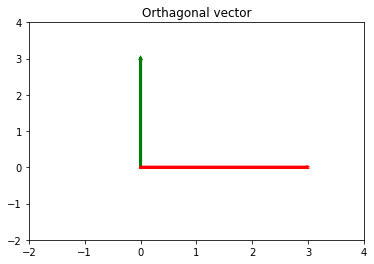

In [141]:
#Sinonym of orthagonal is Perpendicular
plt.xlim(-2,4)          
plt.ylim(-2,4)
v1 = [0,3] 
v2 = [3,0]

# Plot Vectors
plt.arrow(0,0, v1[0], v1[1], linewidth=3,  color ='green')
plt.arrow(0,0, v2[0], v2[1], linewidth=3,  color ='red')

plt.title("Orthagonal vector")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [98]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])
print((a*b).sum())
dotprod = np.vdot(a,b)
dotprod
#it is not perpendicular because the dot product is not equal to 0

-40


-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [113]:
c = np.array([2,-15,6,20])
c_norm_squared = (np.linalg.norm(c))**2
c_norm_squared
cdotc = np.vdot(c,c)
cdotc
print("||c||^2",c_norm_squared)
print("c dot c",cdotc)
ct = c.T
ctc = ct*c
print("cTc",ctc)
print("CTC SUm",ctc.sum())
#both magnictud square and dot product are the same number. Transponce Tis same as c, and *c is squared CTC.sum() also same value as the previous operations

||c||^2 665.0
c dot c 665
cTc [  4 225  36 400]
CTC SUm 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0 \end{bmatrix} + -8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [115]:
f = np.array([4,12,11,9,2])
norm = np.linalg.norm(f)
norm
f_unit = f /norm
f_unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

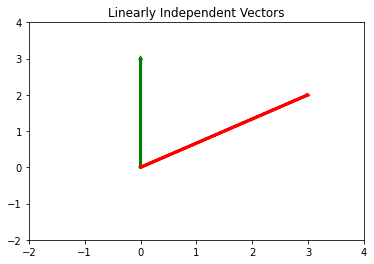

In [124]:
#Linear Independent Vectors

plt.xlim(-2,4)          
plt.ylim(-2,4)

a = [0,3] 
b = [3,2 ]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3,  color ='green')
plt.arrow(0,0, b[0], b[1], linewidth=3,  color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

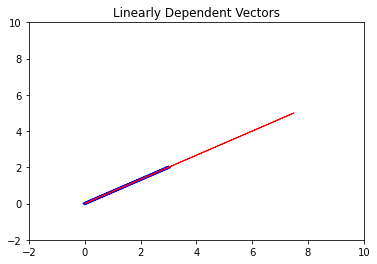

In [142]:
#linear dependent vector
plt.xlim(-2,10)          
plt.ylim(-2,10)


b = [3,2 ]
v2 = np.multiply(2.5,b)
# Plot Vectors
plt.arrow(0,0, b[0], b[1], linewidth=3,  color ='blue')
plt.arrow(0,0, v2[0], v2[1], linewidth=1,  color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [149]:
g = np.array([1,2])
h = np.array([4,8])
mt = np.array([g,h])
print("Span",np.linalg.matrix_rank(mt))

Span 1


t## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [151]:
l = np.array([1,2,3])
m = np.array([-1,0,7])
n = np.array([4,8,2])
mt1 = np.array([l,m,n])
mt1
print("Span",np.linalg.matrix_rank(mt1))

Span 3


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



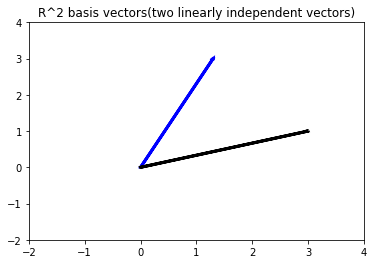

In [153]:

a = [1.3,3] 
b = [3,1 ]
plt.xlim(-2,4)          
plt.ylim(-2,4)

plt.arrow(0,0, a[0], a[1], linewidth=3,  color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3,  color ='black')

plt.title("R^2 basis vectors(two linearly independent vectors)")
plt.show()

## 6.2 What does it mean to form a basis?


A basis is a set of vectors that are linearly indpendent and span the vector space, span vector space to form a basis
basis takes the concept of span and adds the constrain all vectors must be linear independent

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [145]:
P = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])
rank = np.linalg.matrix_rank(P)
print("Rank",rank)

Rank 3


## 7.2 What does the rank of a matrix tell us?

Rank is the number of non redundant vectors within a matrix

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

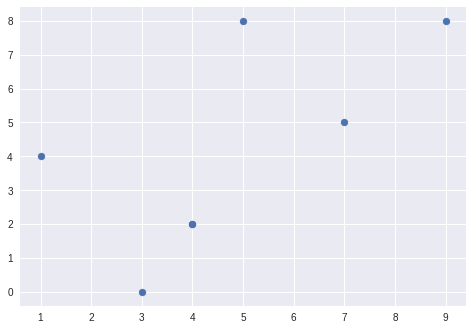

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()